<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dataset Description</title>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        h1 {
            color: red;
        }
        h2 {
            color: blue;
        }
        .feature-list {
            margin-left: 20px;
        }
        .feature-list li {
            color: #34495e;
        }
        .target-variable {
            color: #c0392b;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <h1>About Dataset</h 
1><h3> <p style="color: blue;">This is the HR datasets. In our dataset 50000 rows and 14 columns. Every year, around 5% of its employees have promoted in the company. so, we have the check employee is promoted or not?
</p></h3>s and their promotion status.</p>
    <h2>Features:</h2>
    <ul class="feature-list">
        <li>Employee ID: Unique identifier for each employee</li>
        <li>Department: Department in which the employee works</li>
        <li>Region: Employee's region</li>
        <li>Education: Employee's education level</li>
        <li>Gender: Employee's gender</li>
        <li>Recruitment Channel: Channel through which the employee was recruited</li>
        <li>Number of Trainings: Number of trainings the employee has attended</li>
        <li>Age: Employee's age</li>
        <li>Previous Year Rating: Employee's rating in the previous year</li>
        <li>Length of Service: Number of years the employee has worked in the company</li>
        <li>KPIs met >80%: Whether the employee met more than 80% of Key Performance Indicators</li>
        <li>Awards Won?: Whether the employee has won any awards</li>
        <li>Average Training Score: Average score of the trainings attended by the employee</li>
        <li class="target-variable">Is Promoted (Target Variable): Whether the employee is promoted (0: No, 1: Yes)</li>
    </ul>
</body>
</html>
(0: No, 1: Yes)</li>
    </ul>
</body>
</html>
 (0: No, 1: Yes)</li>
    </ul>
</body>
</html>


In [1]:
import numpy as np 
import pandas as  pd 
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline 

In [2]:
# here owr data is large then using this algo 
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer

In [5]:
employee_promotion = pd.read_csv('train.csv')
employee_promotion.head(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0


In [6]:
employee_promotion.sample(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31111,2427,R&D,region_13,Master's & above,m,other,1,38,3.0,2,1,0,89,0
41614,71536,Operations,region_31,Bachelor's,f,sourcing,1,31,5.0,3,1,1,62,0
22756,19816,Sales & Marketing,region_15,Bachelor's,m,other,1,29,1.0,3,0,0,52,0
52012,38713,Technology,region_5,Master's & above,f,sourcing,1,30,4.0,2,0,0,76,0


In [7]:
employee_promotion['no_of_trainings'].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
employee_promotion['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [9]:
employee_promotion.shape

(54808, 14)

In [10]:
employee_promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
print(type(employee_promotion))

<class 'pandas.core.frame.DataFrame'>


In [12]:
employee_promotion = employee_promotion.drop(columns = ['region'],axis = 1)

In [13]:
employee_promotion = employee_promotion.drop(columns = ['employee_id'],axis = 1)

In [14]:
employee_promotion.isnull().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
missing_values = employee_promotion.isnull().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / len(employee_promotion)) * 100

print(f"Percentage of missing values:{percentage_missing}")


Percentage of missing values:department              0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64


In [16]:
len(employee_promotion)

54808

In [17]:
employee_promotion_1 = employee_promotion.duplicated().sum()
print(f'Number of the duplicate rows : {employee_promotion_1}')

Number of the duplicate rows : 2561


In [18]:
print(type(employee_promotion))

<class 'pandas.core.frame.DataFrame'>


In [19]:
employee_promotion.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [20]:
employee_promotion.describe().corr()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
age,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
previous_year_rating,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
length_of_service,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
KPIs_met >80%,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
awards_won?,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
avg_training_score,0.999999,1.0,0.999999,1.0,0.999999,0.999999,1.000000,0.999999
is_promoted,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000


In [21]:
employee_promotion.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


<!DOCTYPE html>
<html>
<head>
    <style>
        p {
            color: red;
        }
    </style>
</head>
<b  style="color: red";ody>

<p>Here we imputed the educatn in the p.</p>

</body>
</html>
/html>
/html>


In [22]:
columns_to_impute = ['education']

In [23]:
imputer = SimpleImputer(strategy='most_frequent')

In [24]:
imputer_t = imputer.fit_transform(employee_promotion[columns_to_impute])

In [25]:
employee_promotion['education'] = imputer_t.flatten()

In [26]:
employee_promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  50684 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 5.0+ MB


<p style="color: blue;">here we imputed the numeriacal columns which is previous_year_rating

In [27]:
columns_to_impute = ['previous_year_rating']

In [28]:
imputer_numerical =  SimpleImputer(strategy='mean')

In [29]:
imputer_t = imputer_numerical.fit_transform(employee_promotion[columns_to_impute])

In [30]:
employee_promotion['previous_year_rating'] = imputer_t.flatten()

In [31]:
employee_promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 5.0+ MB


<p style="color: red;">Now we applying the eda 

In [32]:
employee_promotion['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16016\3289914192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'department',data = employee_promotion,palette='Set2',edgecolor="black")


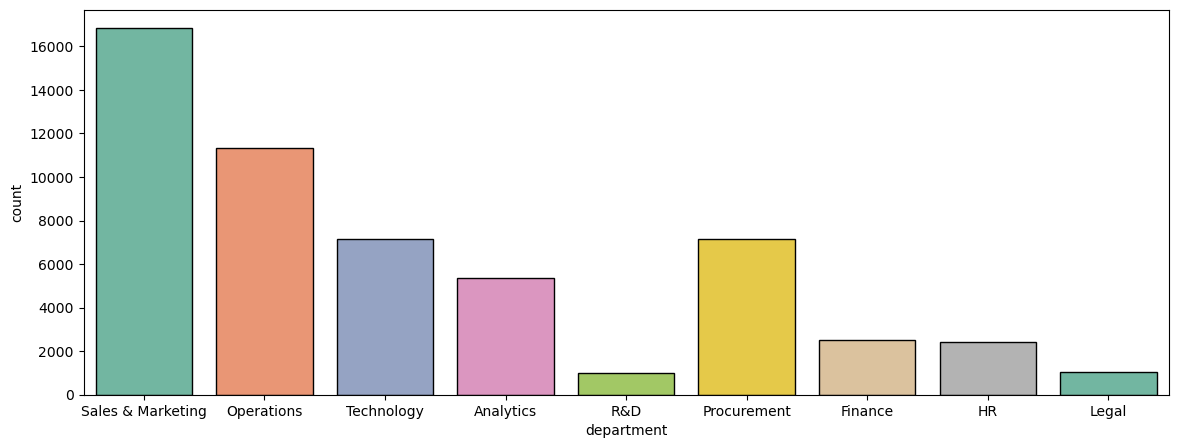

In [33]:
plt.figure(figsize=(14,5))
sns.countplot(x = 'department',data = employee_promotion,palette='Set2',edgecolor="black")
# plt.grid()
plt.show()

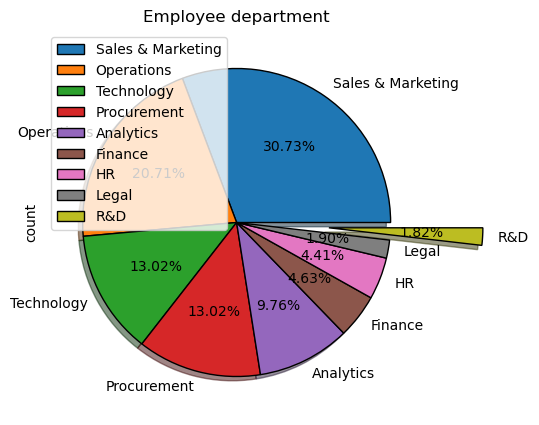

In [34]:
plt.figure(figsize = (14,5))
ex = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]
employee_promotion['department'].value_counts().plot(kind = 'pie',explode = ex,autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('Employee department')
plt.legend(loc='upper left')
plt.show()

In [35]:
employee_promotion['education'].value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16016\1306418750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'education',data = employee_promotion,palette='Set2',edgecolor="black",width=0.5)


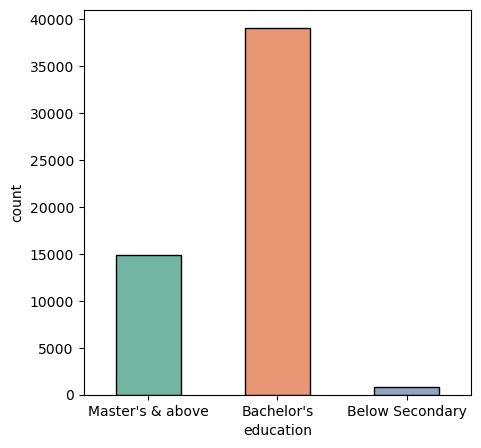

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'education',data = employee_promotion,palette='Set2',edgecolor="black",width=0.5)
# plt.grid()
plt.show()

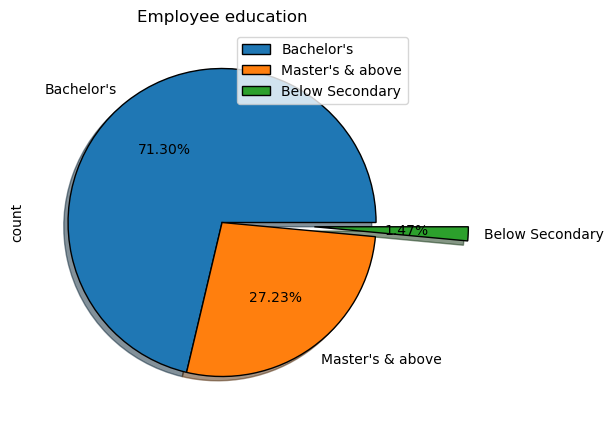

In [37]:
plt.figure(figsize = (14,5))
ex = [0.0,0.0,0.6]
employee_promotion['education'].value_counts().plot(kind = 'pie',explode = ex,autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('Employee education')
plt.legend(loc='upper right')
plt.show()

In [38]:
employee_promotion['gender'].value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16016\1911846372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'gender',data = employee_promotion,palette='Set2',edgecolor="black",width=0.5)


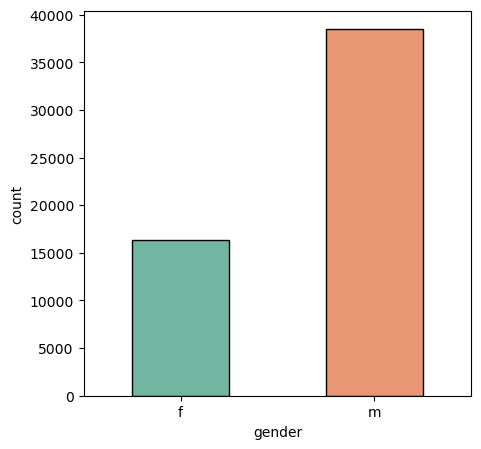

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'gender',data = employee_promotion,palette='Set2',edgecolor="black",width=0.5)
# plt.grid()
plt.show()

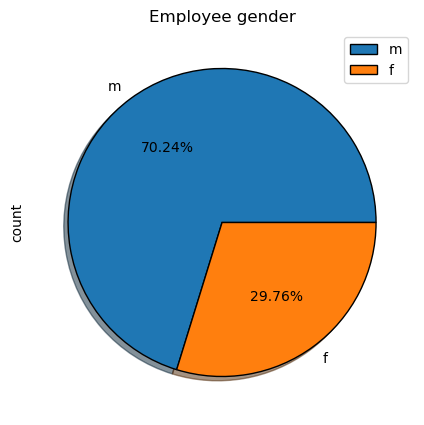

In [40]:
plt.figure(figsize = (14,5))
ex = [0.0,0.0]
employee_promotion['gender'].value_counts().plot(kind = 'pie',explode = ex,autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('Employee gender')
plt.legend(loc='upper right')
plt.show()

In [41]:
employee_promotion['recruitment_channel'].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16016\2531374436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'recruitment_channel',data = employee_promotion,palette='Set2',edgecolor="black",width=0.5)


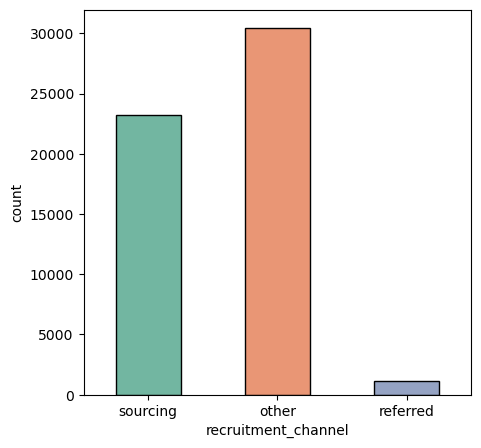

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'recruitment_channel',data = employee_promotion,palette='Set2',edgecolor="black",width=0.5)
# plt.grid()
plt.show()

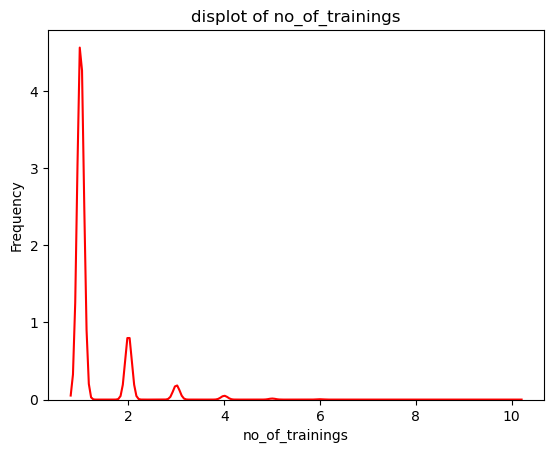

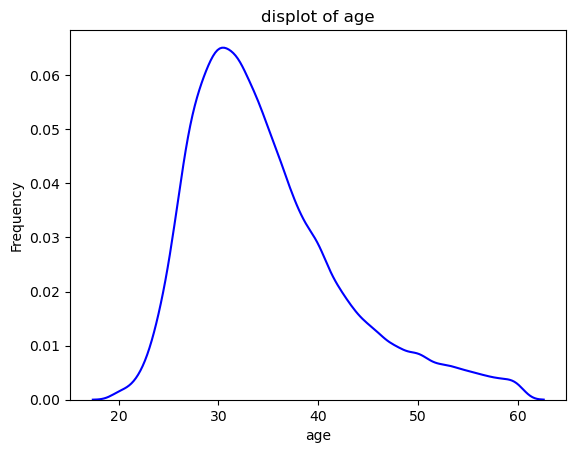

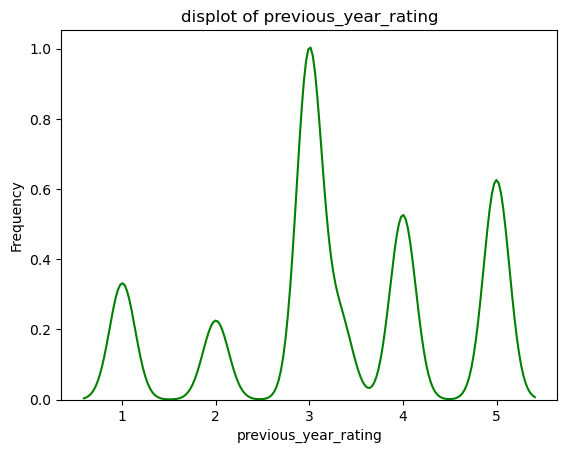

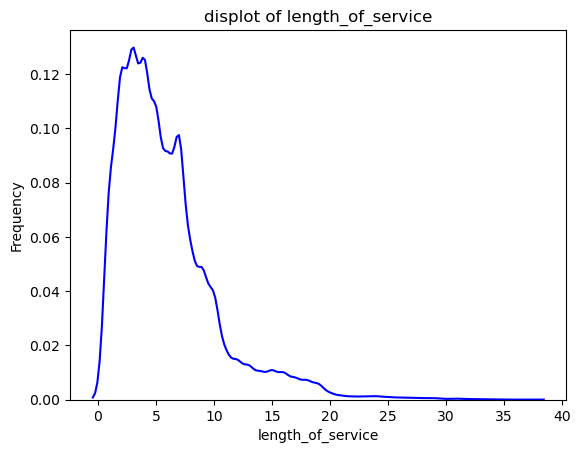

In [43]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for column in employee_promotion.columns:
    
    if column == 'employee_id':
      plt.figure()
      sns.kdeplot(employee_promotion[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif  column == 'no_of_trainings':
      plt.figure()
      sns.kdeplot(employee_promotion[column], color="red")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'age':
      plt.figure()
      sns.kdeplot(employee_promotion[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'previous_year_rating':
      plt.figure()
      sns.kdeplot(employee_promotion[column], color="green")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'length_of_service':
      plt.figure()
      sns.kdeplot(employee_promotion[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'displot of {column}')  # Set plot titl
      plt.show()   


In [70]:
employee_promotion.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


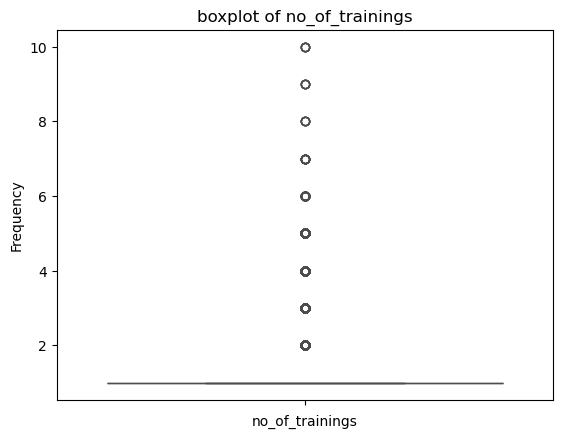

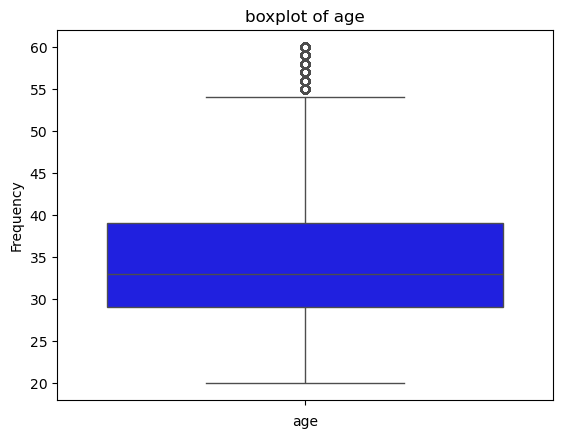

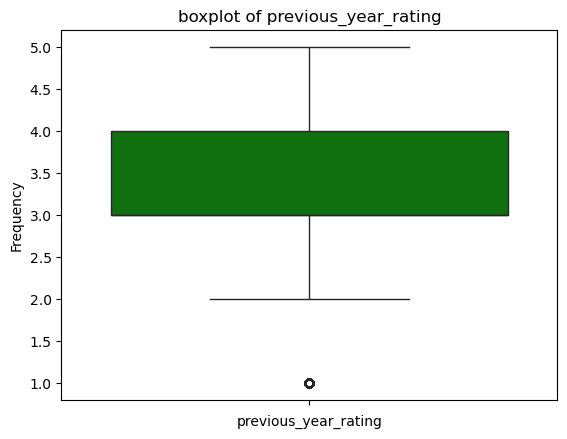

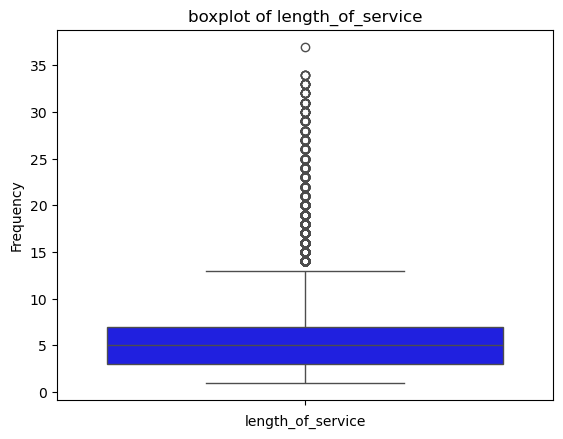

In [69]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for column in employee_promotion.columns:
    
    if column == 'employee_id':
      plt.figure()
      sns.boxplot(employee_promotion[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'boxplot of {column}')  # Set plot titl
      plt.show()   
    elif  column == 'no_of_trainings':
      plt.figure()
      sns.boxplot(employee_promotion[column], color="red")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'boxplot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'age':
      plt.figure()
      sns.boxplot(employee_promotion[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'boxplot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'previous_year_rating':
      plt.figure()
      sns.boxplot(employee_promotion[column], color="green")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'boxplot of {column}')  # Set plot titl
      plt.show()   
    elif column == 'length_of_service':
      plt.figure()
      sns.boxplot(employee_promotion[column], color="blue")  # Plot histogram with 10 bins
      plt.xlabel(column)  # Set x-axis label as the column name
      plt.ylabel('Frequency')  # Set y-axis label
      plt.title(f'boxplot of {column}')  # Set plot titl
      plt.show()   

now handling the outlies in the datasets 

In [46]:
employee_promotion.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [87]:
# Function to calculate outliers using IQR method for specific columns
def calculate_iqr_outliers(employee_promotion, column_names):
    outliers_dict = {}
    outliers_count_dict = {}
    for column in column_names:
        if pd.api.types.is_numeric_dtype(employee_promotion[column]):
            Q1 = employee_promotion[column].quantile(0.25)
            Q3 = employee_promotion[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_mask = (employee_promotion[column] < lower_bound) | (employee_promotion[column] > upper_bound)
            outliers_values = employee_promotion[column][outliers_mask]
            outliers_dict[column] = outliers_values
            outliers_count_dict[column] = outliers_mask.sum()  # Count of outliers
        else:
            print(f"Skipping non-numeric column: {column}")
    return outliers_dict, outliers_count_dict

# Specify the columns to check for outliers
columns_to_check = ['age', 'previous_year_rating','length_of_service']  # Add more columns as needed

# Calculate outliers for the specified columns using IQR method
iqr_outliers_dict, iqr_outliers_count_dict = calculate_iqr_outliers(employee_promotion, columns_to_check)

# Print the outliers for each feature
for column, outliers in iqr_outliers_dict.items():
    print(f"IQR Outliers for {column}:\n{outliers}\n")

# Print the count of outliers for each feature
for column, count in iqr_outliers_count_dict.items():
    print(f"Total number of IQR outliers for {column}: {count}")
   

IQR Outliers for age:
33       57
42       59
49       56
99       60
307      58
         ..
54580    57
54617    57
54628    57
54749    55
54792    59
Name: age, Length: 1435, dtype: int64

IQR Outliers for previous_year_rating:
3        1.0
15       1.0
17       1.0
31       1.0
32       1.0
        ... 
54791    1.0
54793    1.0
54802    1.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 6223, dtype: float64

IQR Outliers for length_of_service:
13       16
42       26
60       17
74       14
99       17
         ..
54691    19
54695    18
54697    15
54754    14
54803    17
Name: length_of_service, Length: 3489, dtype: int64

Total number of IQR outliers for age: 1435
Total number of IQR outliers for previous_year_rating: 6223
Total number of IQR outliers for length_of_service: 3489


In [45]:
employee_promotion_t = employee_promotion.head(1000)

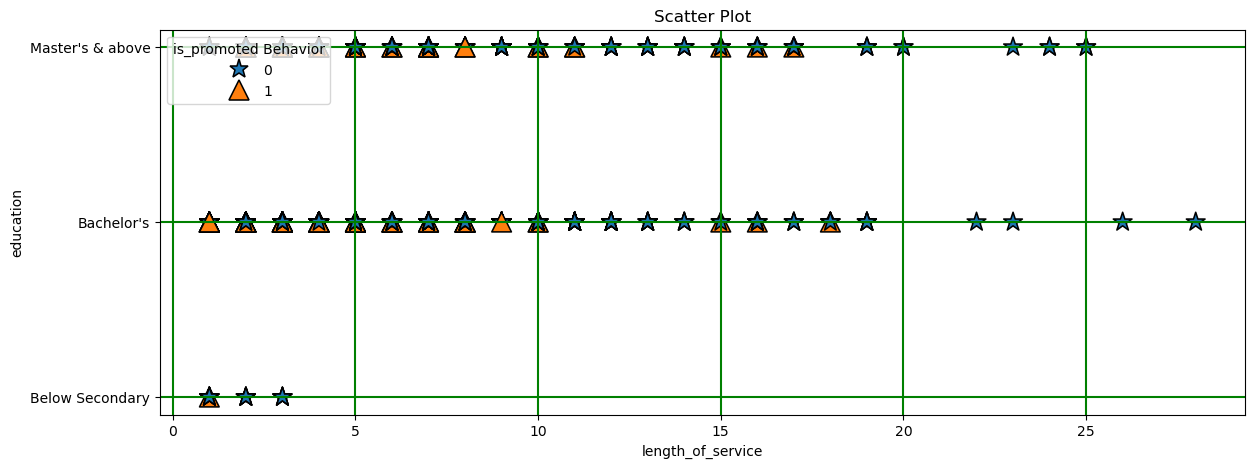

In [47]:
# Creating a scatter plotm 
plt.figure(figsize = (14,5))
m = {0:"*",1:"^"}
sns.scatterplot(x='length_of_service', y='education',data =employee_promotion_t,color = 'r',hue = 'is_promoted',style = "is_promoted",markers = m,s=200,edgecolor='black')
plt.title('Scatter Plot')
plt.legend(title='is_promoted Behavior',loc='upper left')
plt.grid(True,color = 'green',linewidth=1.5)

# Displaying the plot
plt.show()

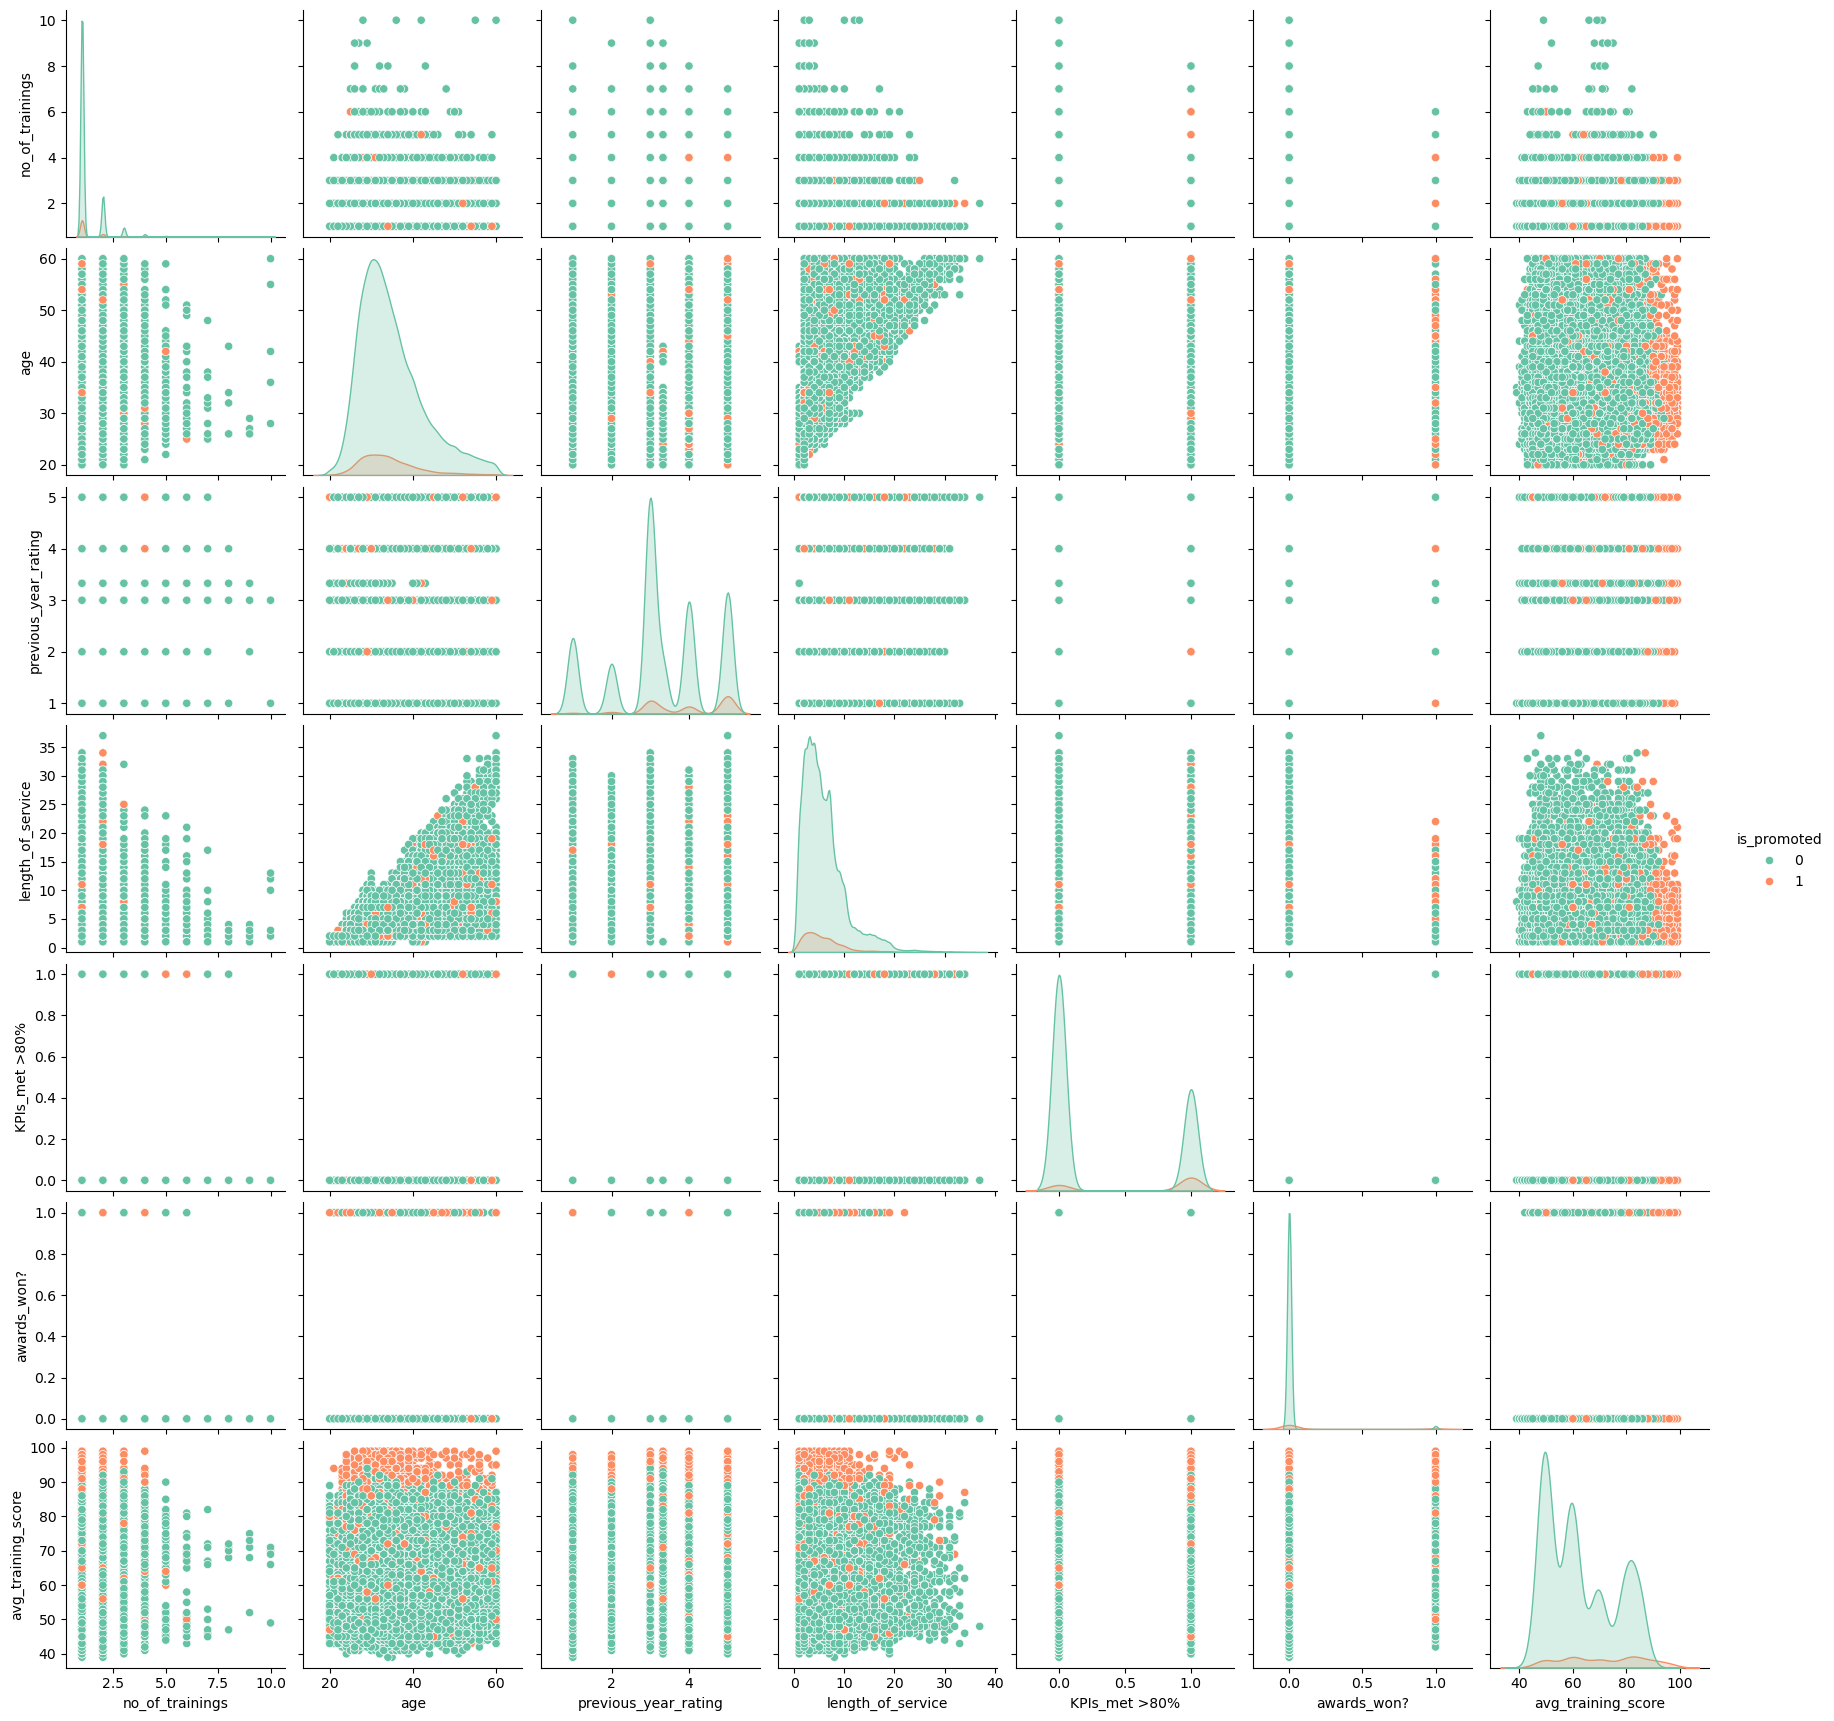

In [48]:
# fist we applying the pair polt
sns.pairplot(employee_promotion,hue = 'is_promoted',palette='Set2')
plt.show()

In [49]:
correlation_matrix = employee_promotion.describe().corr()
correlation_matrix

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
age,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
previous_year_rating,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
length_of_service,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
KPIs_met >80%,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
awards_won?,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000
avg_training_score,0.999999,1.0,0.999999,1.0,0.999999,0.999999,1.000000,0.999999
is_promoted,1.000000,1.0,1.000000,1.0,1.000000,1.000000,0.999999,1.000000


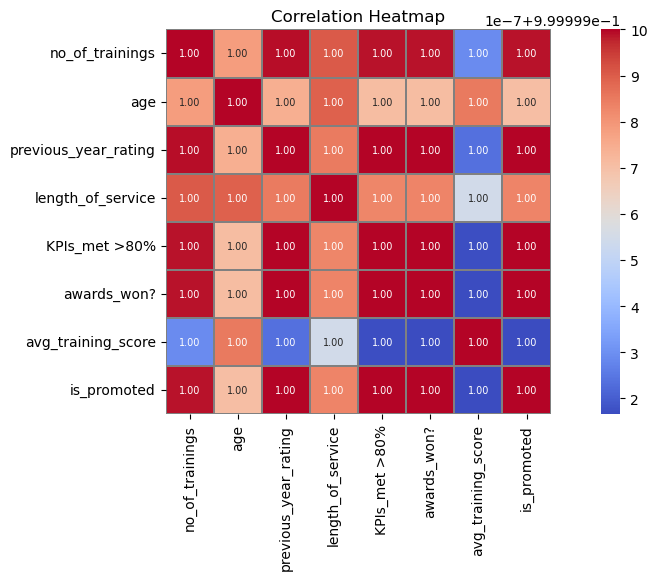

In [50]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

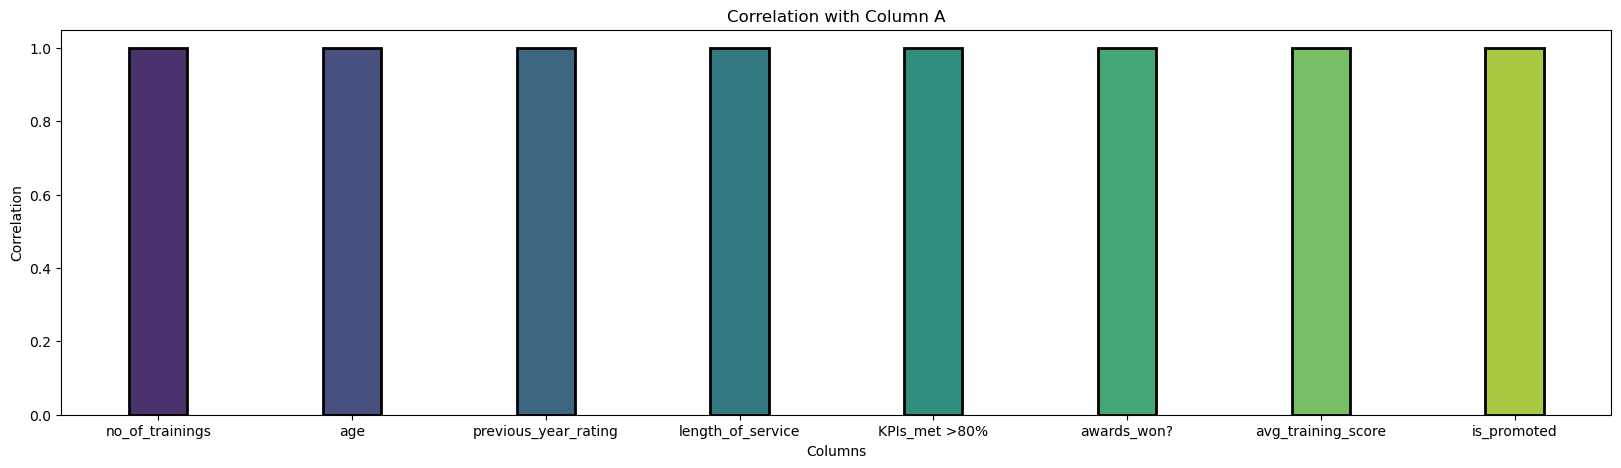

In [51]:
plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,width=0.3)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [52]:
employee_promotion.head(4)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0


In [53]:
x = employee_promotion.drop('is_promoted',axis = 1)
y = employee_promotion['is_promoted']

In [54]:
x.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [55]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 42)

In [57]:
employee_promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 5.0+ MB


In [58]:
employee_promotion.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [59]:
# Define the preprocessing steps for numerical and categorical columns
# numerical_features_imputer = ['previous_year_rating']
numerical_features_scalling = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
# ordinal_features_imputer = ['education']
ordinal_features_encoding = ['education']
categorical_features = ['department', 'gender', 'recruitment_channel']

In [60]:
ordinal_features_encoding

['education']

In [61]:
# numerical_imputer_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean'))   # here this the edu
    
# ])

numerical_scaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])


# ordinal_imputer_transformer = Pipeline(steps=[          # here we imputed before the above the code 
#     ('imputer', SimpleImputer(strategy='most_frequent'))
    
# ])


ordinal_encoding_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())

])



categorical_encoding_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        # ('num_imputer', numerical_imputer_transformer, numerical_features_imputer),
        ('num_scaler', numerical_scaler_transformer, numerical_features_scalling),
        # ('ordinal_imputer',ordinal_imputer_transformer,ordinal_features_imputer),
        ('ordinal_encoding',ordinal_encoding_transformer,ordinal_features_encoding),
        ('cat', categorical_encoding_transformer, categorical_features)
    ])

In [64]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [65]:
from sklearn import set_config
# Plot the pipeline
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('ordinal_encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['education']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['department', 'gender',
                                                   'recruitment_channel'])])),
                ('classifier', RandomForestClassifier())])

In [66]:
# Assuming X_train, y_train are your training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('ordinal_encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['education']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['department', 'gender',
                                                   'recruitment_channel'])])),
                ('classifier', RandomForestClassifier())])

In [67]:
# Assuming X_test, y_test are your test data
y_pred = pipeline.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred)

0.9331326400291917